# Movement samplers
This is the general analysis of movement sampler implementations.

In [39]:
%load_ext autoreload
%autoreload 2

In [67]:
from archived.movement_sampling.movement_samplers import RandomCommuterSampler, PerfectCommuterSampler
from archived.movement_sampling.movement_epidemic import MovementEpidemic
from basic_epidemic import fit_model
from grab_data import get_matrix, get_population_sizes
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

In [41]:
DATASET = 'CENSUS_SUBSAMPLED'
od_matrix = get_matrix(DATASET)
pop_sizes = get_population_sizes(DATASET)

# Random Commuter to Simple

In [1]:
b, g, p = 1.8, 0.4, 0.8
random_epi = MovementEpidemic(RandomCommuterSampler, od_matrix, pop_sizes, beta=b, gamma=g, psi=p, t_max=100)
random_sim = random_epi.simulate()

NameError: name 'MovementEpidemic' is not defined

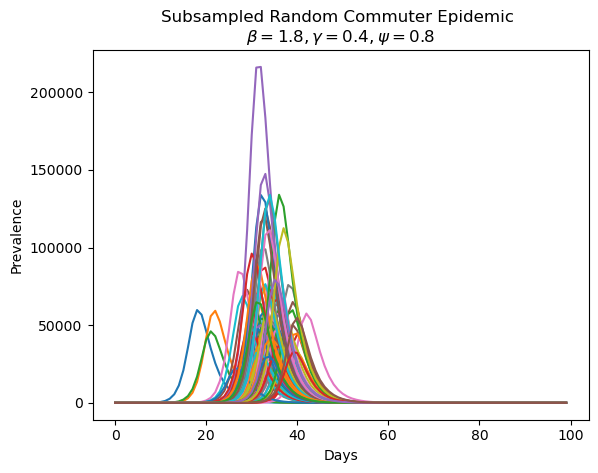

In [63]:
plt.plot(random_sim[1])
plt.title('Subsampled Random Commuter Epidemic \n' + r'$\beta = 1.8, \gamma=0.4, \psi=0.8$')
plt.xlabel('Days')
plt.ylabel('Prevalence')
plt.show()

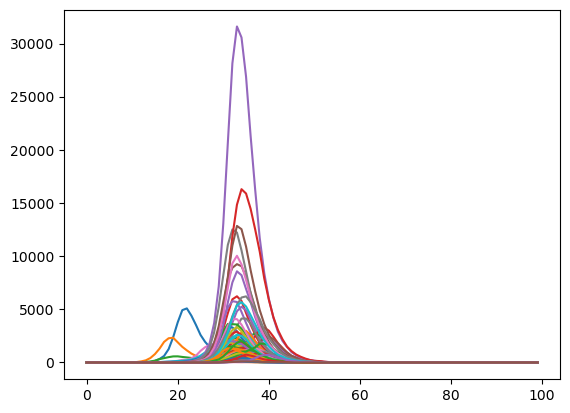

In [102]:
random_sim_commuters = deepcopy(random_sim[3])
diag_mask = np.eye(random_sim_commuters.shape[1], dtype=bool)
diag_mask = np.repeat(diag_mask[None, ...], random_sim_commuters.shape[0], axis=0)
random_sim_commuters[diag_mask] = 0
random_incoming_infected_commuters = random_sim_commuters.sum(axis=1)
plt.plot(random_incoming_infected_commuters)
plt.show()

# Plot commuters vs total


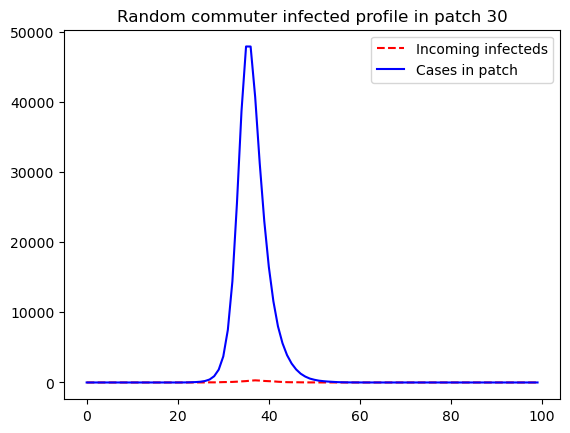

In [110]:
i= 30
plt.plot(random_incoming_infected_commuters[:,i], linestyle='--', c='r', label='Incoming infecteds')
plt.plot(random_sim[1][:,i], c='b', label='Cases in patch')
plt.legend()
plt.title(f'Random commuter infected profile in patch {i}')
plt.show()

In [55]:
random_commuter_counts.shape

(100, 86)

In [79]:
random_res = fit_model(random_sim[:-1], od_matrix, pop_sizes, t_delta=1)
random_res

(1.7999302789530696, 0.3998959746809854, 0.7999688787058673)

In [23]:
from basic_epidemic import gamma_nll

g_range = np.linspace(0.1, 1, 100)
plt.plot(g_range, [gamma_nll(g, random_sim) for g in g_range])
plt.show()

ValueError: too many values to unpack (expected 3)

# Perfect commuter to simple

In [24]:
perfect_epi = MovementEpidemic(PerfectCommuterSampler, od_matrix, pop_sizes, beta=1.8, gamma=0.4, psi=0.8, t_max=100)
perfect_sim = perfect_epi.simulate()

Simulation finished, aggregating states.


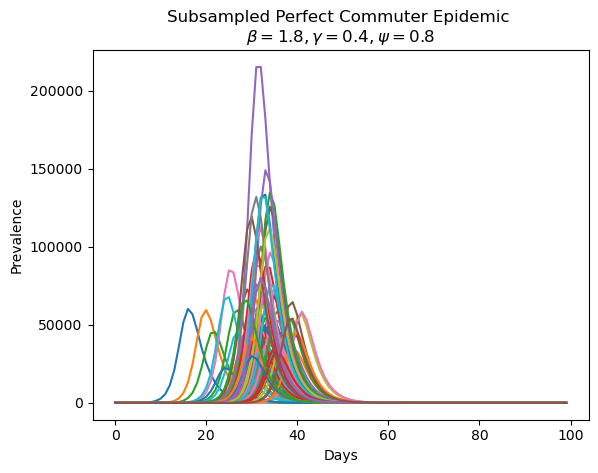

In [25]:
plt.plot(perfect_sim[1])
plt.title('Subsampled Perfect Commuter Epidemic \n' + r'$\beta = 1.8, \gamma=0.4, \psi=0.8$')
plt.xlabel('Days')
plt.ylabel('Prevalence')
plt.show()

In [62]:
perfect_res = fit_model(perfect_sim[:-1], od_matrix, pop_sizes, t_delta=1)
perfect_res

(1.8001294845489577, 0.4000666006536772, 0.8000015790798654)

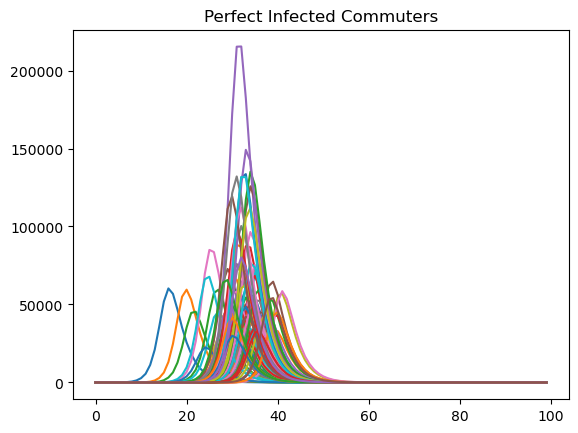

In [60]:
perfect_commuter_counts = (perfect_sim[3]).sum(axis=2)
plt.plot(perfect_commuter_counts)
plt.title('Perfect Infected Commuters')
plt.show()

In [105]:
import pandas as pd

estimates = pd.read_csv('perfect_commuter_results.csv', header=None).values

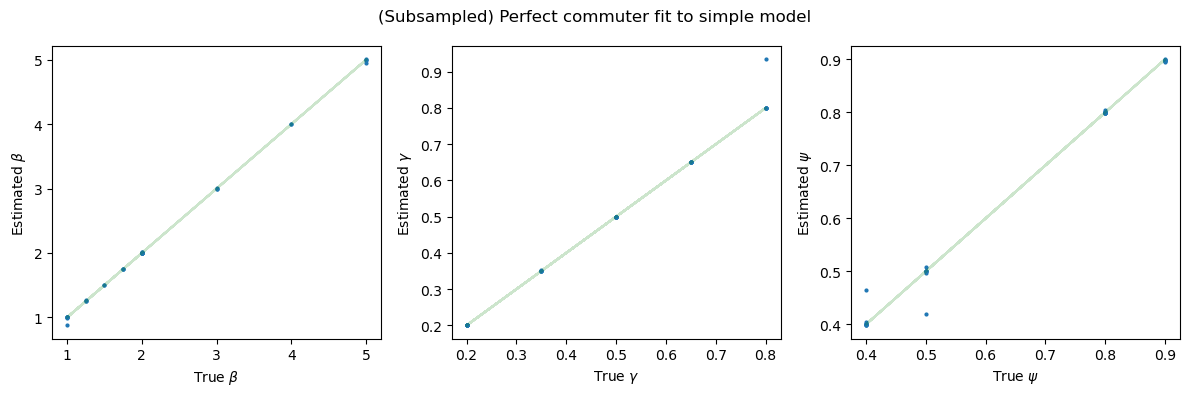

In [106]:
from basic_epidemic import visualise_fits

visualise_fits(estimates[:, :3], estimates[:, 3:], '(Subsampled) Perfect commuter fit to simple model')


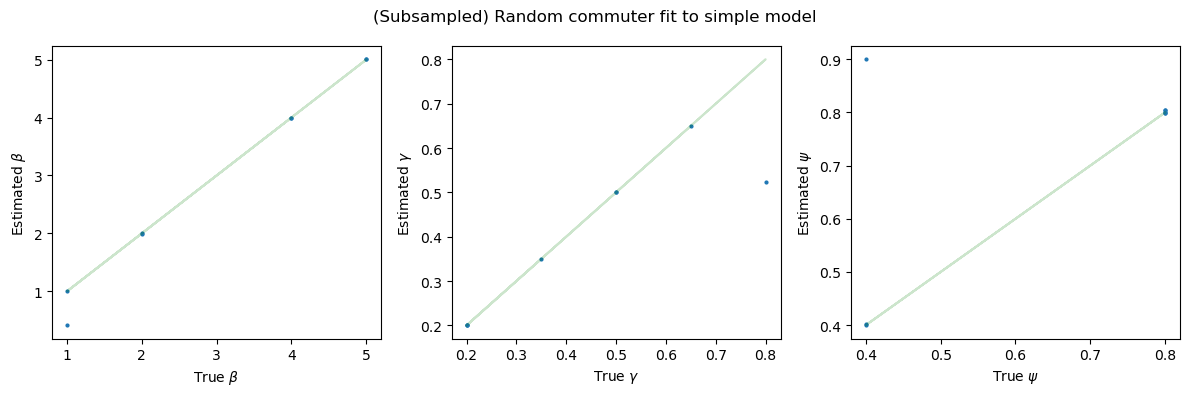

In [97]:
random_estimates = pd.read_csv('random_commuter_results.csv', header=None).values
visualise_fits(random_estimates[:, :3], random_estimates[:, 3:], '(Subsampled) Random commuter fit to simple model')
